## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('./data/cleaned_df.csv')

## EDA

In [3]:
df.describe()

,ID,Age,Enrollment_Age,Tot_Dependents,Household_Size,Income,Tot_Spent,Tot_Purchased,Recency,Wines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Has_Dependents,Tot_AccptCmp,Days_Enrolled
count,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,...,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000
mean,5613.582069,54.509655,43.600000,1.124138,2.775172,42970.506897,304.736552,11.528966,48.818621,180.897931,...,0.064828,0.062759,0.023448,0.022759,0.008966,0.010345,0.099310,0.846207,0.182759,3947.412414
std,3262.472794,11.337058,11.383278,0.682855,0.831865,17148.578237,377.147414,6.506422,29.034490,263.139920,...,0.246306,0.242612,0.151375,0.149184,0.094294,0.101217,0.299181,0.360875,0.497453,198.864057
min,1.000000,28.000000,16.000000,0.000000,1.000000,7500.000000,8.000000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3615.000000
25%,2808.000000,46.000000,35.000000,1.000000,2.000000,30279.000000,48.000000,6.000000,24.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3769.250000
50%,5551.500000,53.000000,42.000000,1.000000,3.000000,41305.000000,114.000000,9.000000,49.000000,46.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3939.000000
75%,8419.500000,63.000000,52.000000,2.000000,3.000000,55338.750000,424.000000,16.000000,74.000000,233.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4115.000000
max,11191.000000,84.000000,73.000000,3.000000,5.000000,90933.000000,1835.000000,35.000000,99.000000,1218.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4314.000000


In [4]:
df.nunique()

ID                   1450
Age                    54
Enrollment_Age         55
Education               4
Marital_Status          2
Tot_Dependents          4
Household_Size          5
Income               1292
Income_Level            3
Tot_Spent             585
Tot_Purchased          29
Enrollment            597
Recency               100
Wines                 468
Fruits                 72
Meats                 266
Fish                   84
Sweets                 74
Gold                  109
DiscountPurchases       6
WebPurchases           12
CatalogPurchases       10
StorePurchases         12
WebVisits              11
AcceptedCmp3            2
AcceptedCmp4            2
AcceptedCmp5            2
AcceptedCmp1            2
AcceptedCmp2            2
Complain                2
Response                2
Has_Dependents          2
Tot_AccptCmp            5
Days_Enrolled         597
dtype: int64

### Are there any patterns or relationships between customer attributes and their response to the last marketing campaign?

In [5]:
#average age of customers
print("Average Customer age:", df['Age'].mean())
#average age of customer at enrollment
print("Average Enrollment age:", df['Enrollment_Age'].mean())
#average age of days enrolled
print("Average Enrollment days:", df['Days_Enrolled'].mean())

Average Customer age: 54.509655172413794
Average Enrollment age: 43.6
Average Enrollment days: 3947.4124137931035


In [6]:
#average age of customers who responded to last campaign
responded = df[df['Response'] == 1]
average_age = responded['Age'].mean()
print("Average age of Customers who gave a response:", average_age)

Average age of Customers who gave a response: 53.86805555555556


In [7]:
#highest enrollment period based on number of responses
enrollment_responses = df.groupby('Enrollment')['Response'].sum()
highest_response = enrollment_responses.idxmax()
print("Highest enrollment period:", highest_response)

Highest enrollment period: 2012-09-07


In [8]:
#ratio of responses by household size
customer_hh = df['Household_Size'].value_counts() #customers in household
hhs_response = df.groupby('Household_Size')['Response'].sum() #response by household size
response_ratio = hhs_response / customer_hh

print("Ratio of responses by household size:")
print(response_ratio)

Ratio of responses by household size:
Household_Size
1    0.231707
2    0.114943
3    0.089706
4    0.060086
5    0.000000
dtype: float64


In [9]:
#income by education
inc_by_edu = df.groupby('Education')['Income'].describe()
inc_by_edu.sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
PhD,336.0,49769.845238,15851.503689,14849.0,36954.50,49052.5,61549.75,90933.0
Master,379.0,42391.110818,16874.580689,7500.0,30530.50,41473.0,54519.00,90247.0
Bachelor,683.0,41703.133236,16606.216407,7500.0,28743.50,39922.0,53506.00,89694.0
High School,52.0,19905.692308,5953.113295,7500.0,15203.75,20425.0,24666.00,30801.0


In [10]:
print(f"There are {inc_by_edu['count'].sum()} customers who have an education. Of these individuals, the top earners had a PhD with an average income of ${inc_by_edu.loc['PhD', 'mean']}. The lowest earners were High School graduates with an average income of ${inc_by_edu.loc['High School', 'mean']}")

There are 1450.0 customers who have an education. Of these individuals, the top earners had a PhD with an average income of $49769.84523809524. The lowest earners were High School graduates with an average income of $19905.69230769231


In [11]:
#mean income at each income level according to education level for those who responded to campaigns 
responded.groupby(['Education','Income_Level'])['Income'].mean().reset_index()

,Education,Income_Level,Income
0,Bachelor,low income,21703.809524
1,Bachelor,lower-middle income,41802.296296
2,Bachelor,middle income,73069.111111
3,High School,low income,18456.000000
4,Master,low income,19530.083333
5,Master,lower-middle income,40162.833333
6,Master,middle income,74005.000000
7,PhD,low income,26187.250000
8,PhD,lower-middle income,43510.964286
9,PhD,middle income,74671.722222


In [12]:
#finding the income level grouping of customers at each education level
inc_lvl_edu = df.groupby('Education')['Income_Level'].agg(lambda x: x.mode()[0])
inc_lvl_edu

Education
Bachelor       lower-middle income
High School             low income
Master         lower-middle income
PhD            lower-middle income
Name: Income_Level, dtype: object

In [13]:
#average spending level of responded customers
average_spending_responded = responded['Tot_Spent'].mean()
overall_average_spending = df['Tot_Spent'].mean()

print("Average spending level of responded customers:", average_spending_responded)
print("Overall average spending level:", overall_average_spending)

Average spending level of responded customers: 418.5208333333333
Overall average spending level: 304.73655172413794


## Visualizations

### Customer

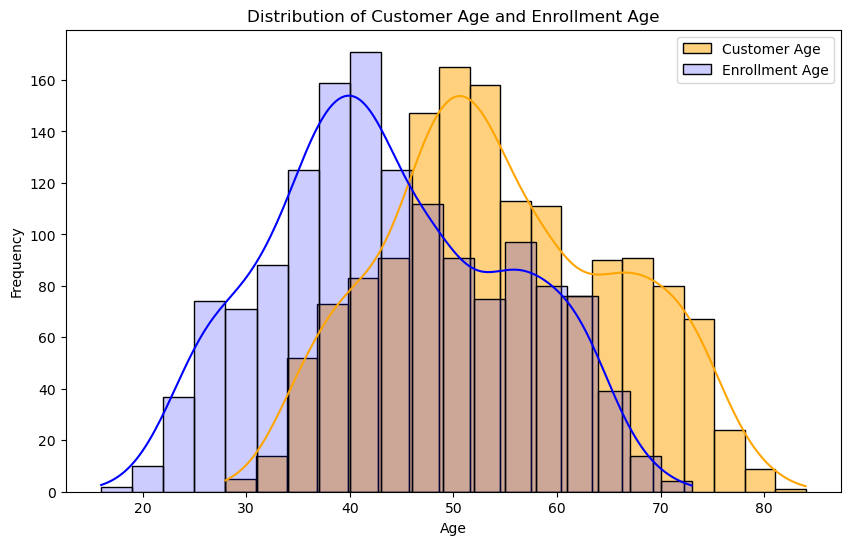

In [14]:
#distribution of customer age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], color='orange', alpha=0.5, kde=True, label='Customer Age')
sns.histplot(df['Enrollment_Age'], color='blue', alpha=0.2, kde=True, label='Enrollment Age')

plt.title('Distribution of Customer Age and Enrollment Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend();

Customer has been engaged with the company for a considerable period, during which they have aged causing `Enrollment Age` to generally be lower than the `Customer Age`

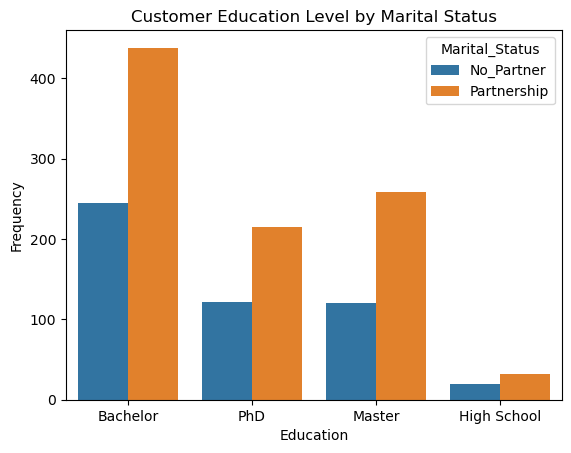

In [15]:
sns.countplot(data=df,x='Education',hue="Marital_Status")
plt.title("Customer Education Level by Marital Status")
plt.ylabel("Frequency");

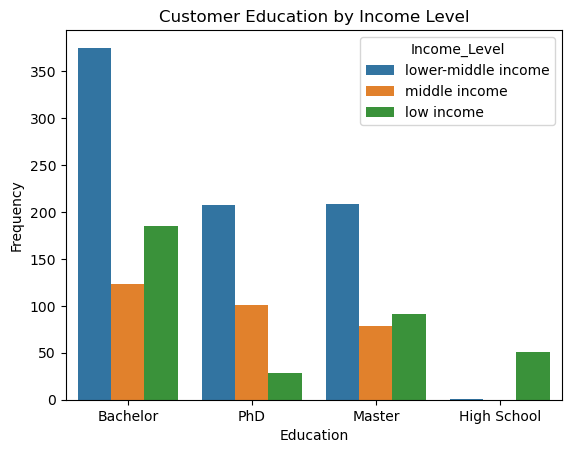

In [16]:
sns.countplot(data=df,x='Education',hue="Income_Level")
plt.title("Customer Education by Income Level")
plt.ylabel("Frequency");

Many customers are in a partnership, fall into the lower-middle income classification, and have a Bachelor's degree

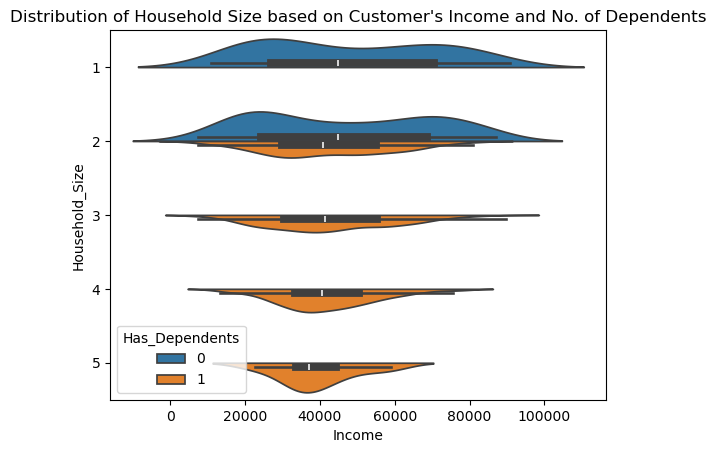

In [17]:
#distribution of household size by dependents age
sns.violinplot(data = df, y = 'Household_Size', x = 'Income', hue = df['Has_Dependents'], split = True, orient = 'h')
plt.title("Distribution of Household Size based on Customer's Income and No. of Dependents");

This gains insight into the demographic of customers. For instance, customers who do not have dependents have higher incomes, and also have a household size of 1, indicating they are not partnered. Customers who do have dependents have lower income, are in a partnership.

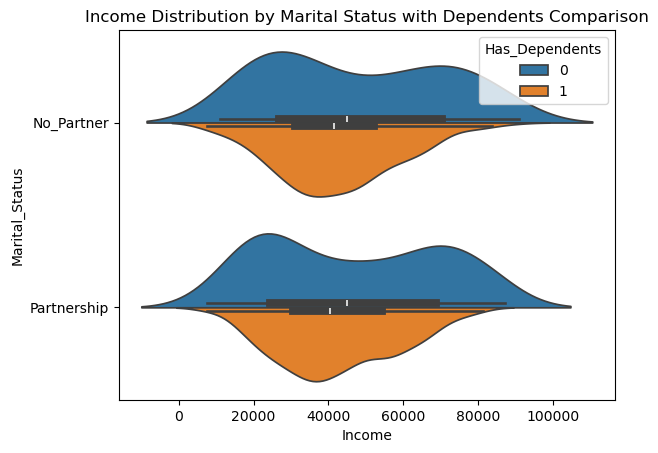

In [52]:
#distribution of income by marital_status based on dependents
sns.violinplot(data = df, y = 'Marital_Status', x = 'Income', hue = df['Has_Dependents'], split = True, orient = 'h')
plt.title("Income Distribution by Marital Status with Dependents Comparison");

Customers who do not have dependents have higher incomes, and of these customers, the ones who earn the most are not partnered

### Campaign

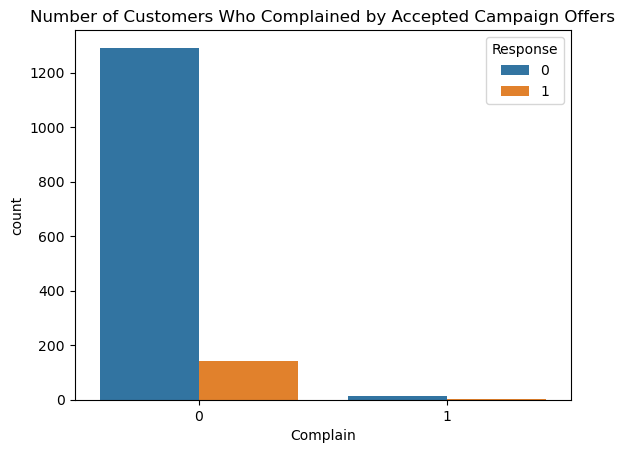

In [37]:
#complaints by responses
sns.countplot(data = df, x ='Complain', hue = 'Response')
plt.title("Number of Customers Who Complained by Accepted Campaign Offers");

The complaints of the company are low. Of customers who did complain (1), many did not accept the lastest campaign offer (blue). For customers who did not complain(0), very few accepted campaign offers as well (orange). 

#### Response to Campaign by Customer Demographic

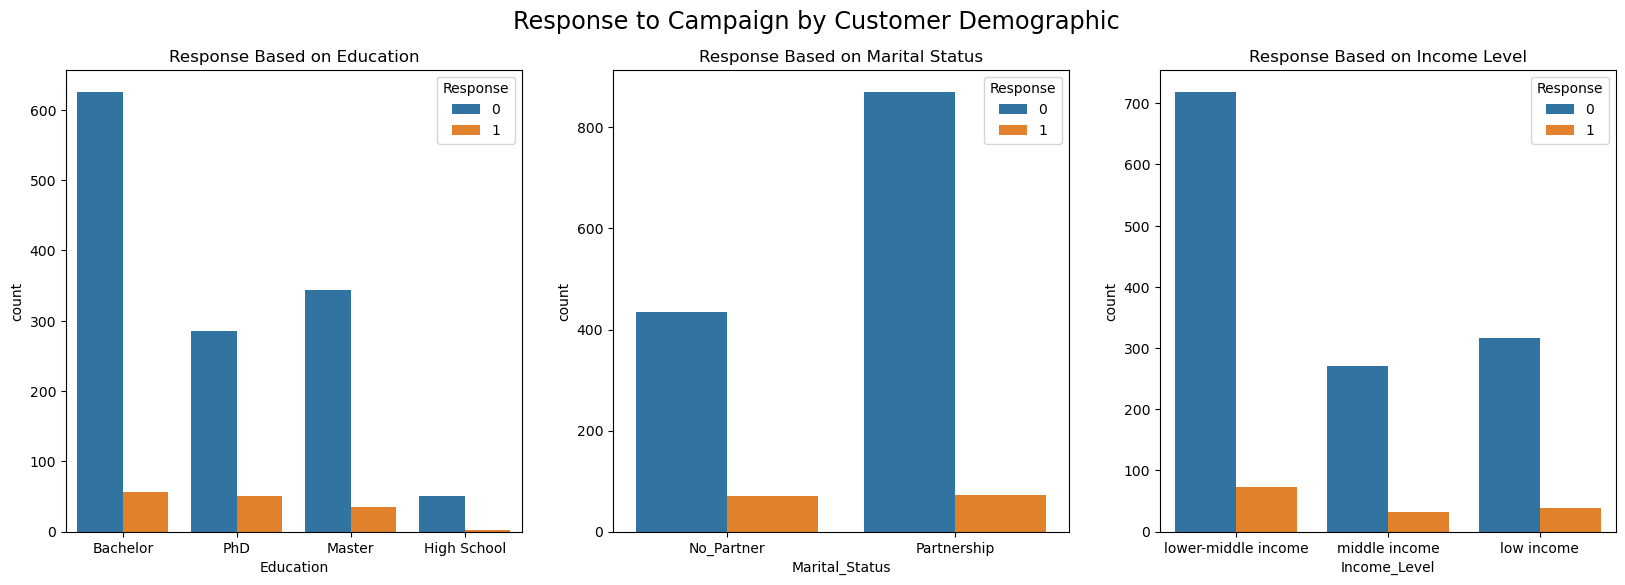

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

#response and education level
sns.countplot(data=df, x='Education', hue='Response', ax=axes[0])
axes[0].set_title('Response Based on Education')

#response and marital status
sns.countplot(data=df,x = 'Marital_Status', hue  = 'Response', ax=axes[1])
axes[1].set_title('Response Based on Marital Status')

#response based on income level
sns.countplot(data=df,x = 'Income_Level', hue  = 'Response', ax=axes[2])
axes[2].set_title('Response Based on Income Level')

plt.suptitle("Response to Campaign by Customer Demographic", fontsize='xx-large');

While customers with Bachelor's degrees may have a lower campaign acceptance relative to other education levels, they narrowly constitute the group with the highest acceptance overall. Customers with in a partnership are least likely to accept the offer, with acceptance being relatively the same across customer's with partners vs without. If a customer is lower-middle income, they are least likely to accept a campaign offer; however, they still contribute significantly to the total number of accepted campaigns.

### Behavioral

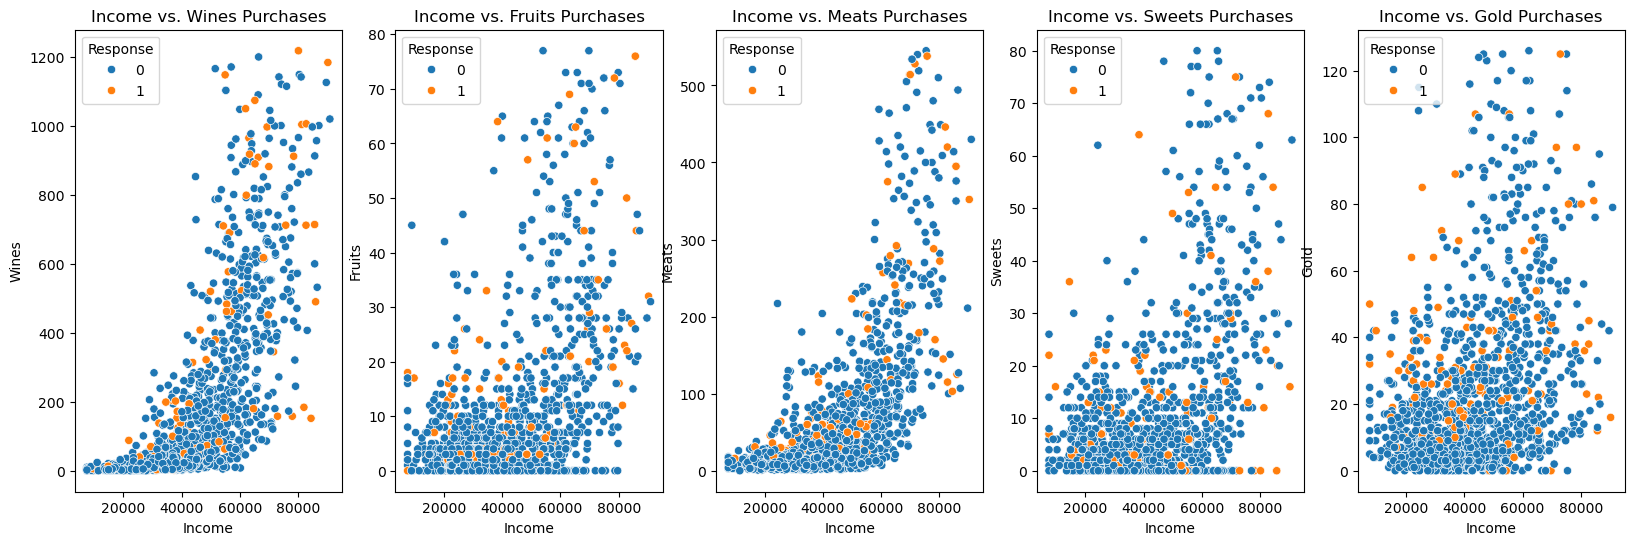

In [20]:
#response by items purchased
fig, axes = plt.subplots(1, 5, figsize=(20, 6))

#wines
sns.scatterplot(data=df, x="Income", y="Wines", hue="Response", ax=axes[0])
axes[0].set_title("Income vs. Wines Purchases")

#fruits
sns.scatterplot(data=df, x="Income", y="Fruits", hue="Response", ax=axes[1])
axes[1].set_title("Income vs. Fruits Purchases")

#meats
sns.scatterplot(data=df, x="Income", y="Meats", hue="Response", ax=axes[2])
axes[2].set_title("Income vs. Meats Purchases")

#sweets
sns.scatterplot(data=df, x="Income", y="Sweets", hue="Response", ax=axes[3])
axes[3].set_title("Income vs. Sweets Purchases")

#gold
sns.scatterplot(data=df, x="Income", y="Gold", hue="Response", ax=axes[4])
axes[4].set_title("Income vs. Gold Purchases");

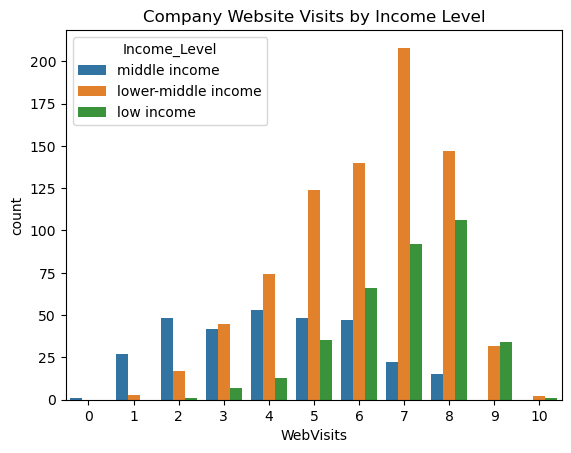

In [21]:
#seeing the breakdown of website visits by income level
sns.countplot(data=df,x = 'WebVisits', hue  = 'Income_Level')
plt.title("Company Website Visits by Income Level");

### Spending

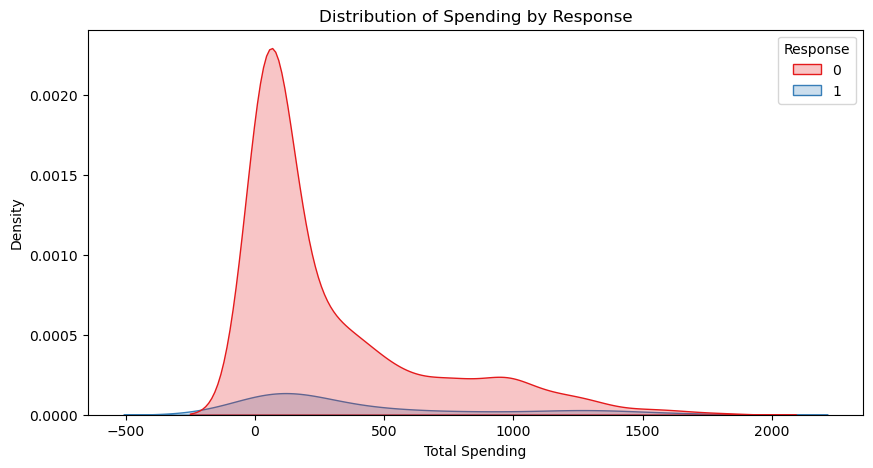

In [22]:
#distribution of spending with hue as response
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='Tot_Spent', hue='Response', fill=True, palette='Set1')
plt.title('Distribution of Spending by Response')
plt.xlabel('Total Spending')
plt.ylabel('Density')
plt.show()

This gains insight into the spending behavior of customers who are more likely to respond to the campaign. This information can be valuable for targeted marketing strategies or campaign optimization. For instance, areas of higher density in the plot indicate regions where higher spending frequencies are more prevalent among non-responding customers.


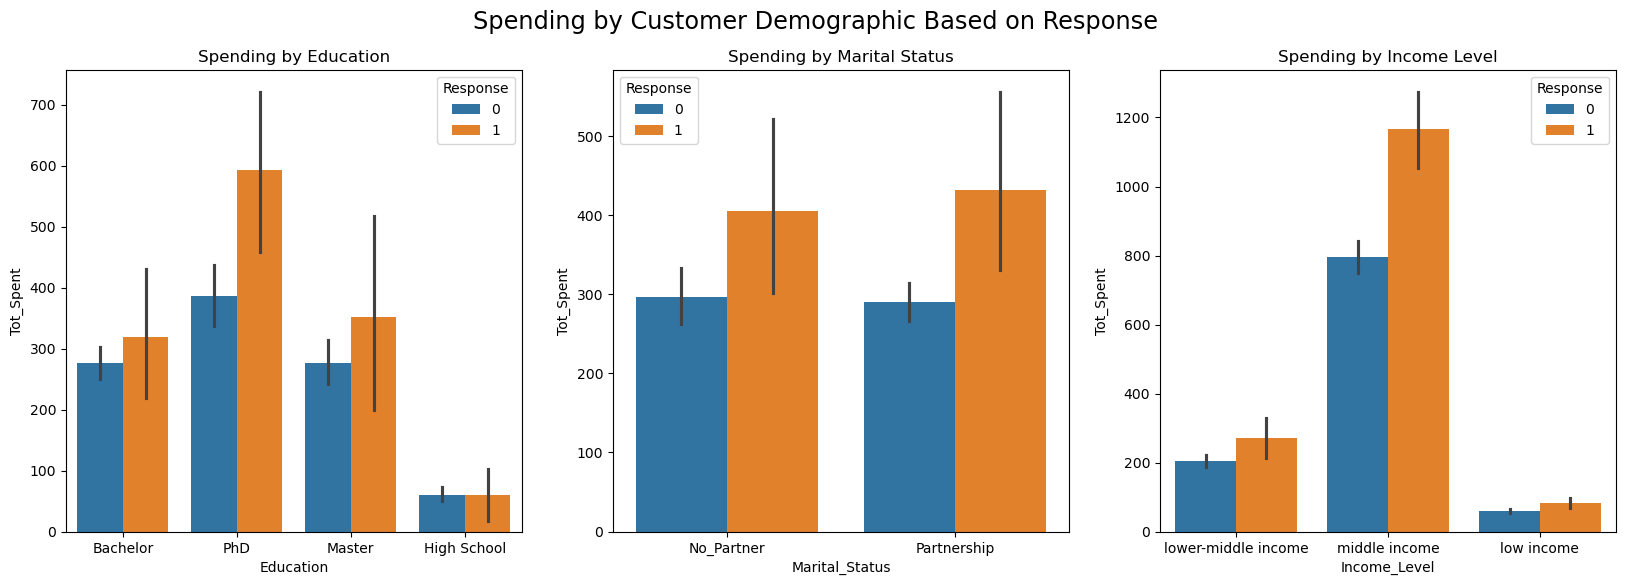

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

#response and education level by spending
sns.barplot(data=df, x='Education', y ='Tot_Spent',hue='Response', ax=axes[0])
axes[0].set_title('Spending by Education')

#response and marital status by spending
sns.barplot(data=df,x = 'Marital_Status', y ='Tot_Spent',hue='Response', ax=axes[1])
axes[1].set_title('Spending by Marital Status')

#response based on income level by spending
sns.barplot(data=df,x = 'Income_Level', y ='Tot_Spent',hue='Response', ax=axes[2])
axes[2].set_title('Spending by Income Level')

plt.suptitle("Spending by Customer Demographic Based on Response", fontsize='xx-large');

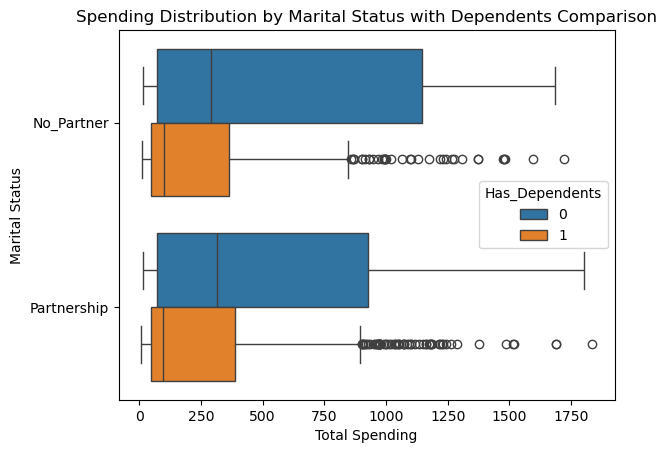

In [49]:
#distribution of spending by marital_status based on dependents
sns.boxplot(data=df, x='Tot_Spent', y='Marital_Status', hue='Has_Dependents')
plt.title("Spending Distribution by Marital Status with Dependents Comparison")
plt.xlabel("Total Spending")
plt.ylabel("Marital Status");

Customers without dependents spend more, especially those who are partnered. Conversely, customers with dependents, without partnership, have lower spending.

### Summary

Outliers were addressed in the data preprocessing step. The risks and limitations of analyzing this dataset skdjhskfhsdkhf. My EDA will help give a surface level analysis of customer behavior before clustering and analyzing behavior by customer segmentation. I can identify how the behavior changes after my modeling process. Some risks and limitations here include having a lot of features as feature selection is important in clustering. Also, exploring the data may not uncover all relevant patterns or relationships at this time.